<a href="https://colab.research.google.com/github/prp021/hello-world/blob/main/PlantsSeedlingClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plants Seedling Classification

## Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## Data Description

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:
images.npy
Label.csv
Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
The goal of the project is to create a classifier capable of determining a plant's species from an image.

## List of Plant species

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet
- Guide to solve the project seamlessly



## Import the libraries

In [1]:
# for reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os

# for displaying images using OpenCV
from google.colab.patches import cv2_imshow                                                   

# for clearing memory and setting random seed
from tensorflow.keras import backend
import random

# for one hot encoding
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 

# for model building
from sklearn.model_selection import train_test_split

# for convolution neural network
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ReduceLROnPlateau

# for data augmentation
from keras.preprocessing.image import ImageDataGenerator

# for metrics
from sklearn.metrics import classification_report


## Load the data

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# load the images file
images = np.load('/content/drive/MyDrive/Colab Notebooks/ComputerVisionProject/images.npy')

# load the labels file
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ComputerVisionProject/Labels.csv')

## Overview of the dataset
Let's print the shape of the images and labels

In [4]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


The dataset is composed of 4750 images of 128 x 128 pixels and 3 channels.

In [5]:
# print array data for an image
images[0]

array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

In [6]:
# get number of unique plant classes
labels['Label'].nunique()

12

There are 12 classes of plants in the dataset

In [7]:
# get unique plant classes
labels['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

## Plotting images using OpenCV and matplotlib


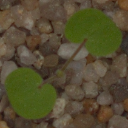

In [8]:
# plot image using OpenCV
cv2_imshow(images[20])

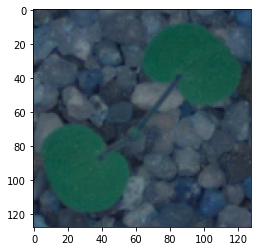

In [9]:
# plot image using matplotlib
plt.imshow(images[20])

- We can observe that the images are being shown in different colors when plotted with OpenCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- We could convert the BGR images to RGB images for easy interpretability, but it is not necessary.

In [10]:
# Converting images from BGR to RGB using cvtColor function of OpenCV
#for i in range(len(images)):
#  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

## Exploratory Data Analysis

#### Visualize the data

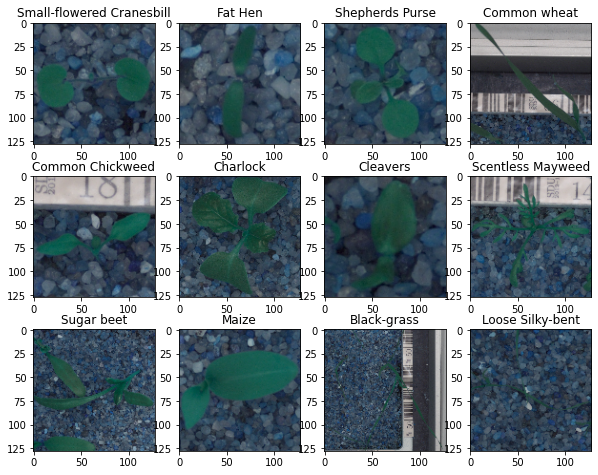

In [11]:
# get image from each of the plant classes
plants = []
for label in labels['Label'].unique():
  indexOfPlant = labels[labels['Label']==label].index[0]
  plants.append(images[indexOfPlant])

# display image and label of each type of plant in the dataset
rows = 3                                                                     
cols = 4
keys=labels['Label'].unique()  
index = 0;                                                                   
fig = plt.figure(figsize=(10, 8))                              
for i in range(cols):
    for j in range(rows):                                  
        # Adding subplots with 3 rows and 4 columns
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)            
        # Plotting the image 
        ax.imshow(plants[index])                                      
        ax.set_title(keys[index])
        index=index+1
plt.show()

Let us also visualize some random images

In [12]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

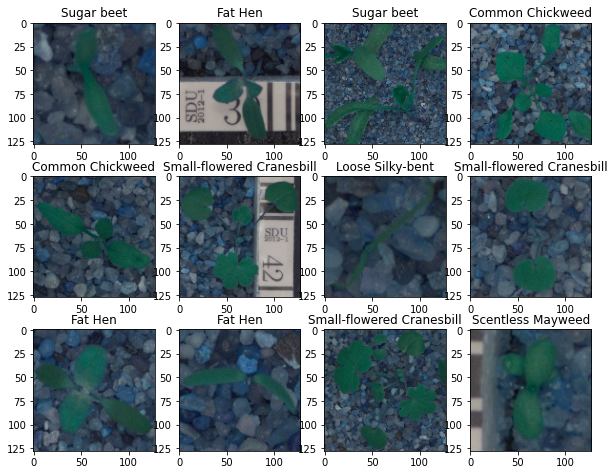

In [13]:
plot_images(images,labels)

- Some plants such as 'Loose Silky-bent' and 'Black-grass' are difficult to identify against the background of the pebbles. 
- Some of the images also have barcodes in them. This might make it difficult for our model to identify patterns. 
- We can try to 
  - apply Gaussian Blur to reduce the noise in the image.
  - mask the background to pick up only the green portions of the image.

#### Check for data imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

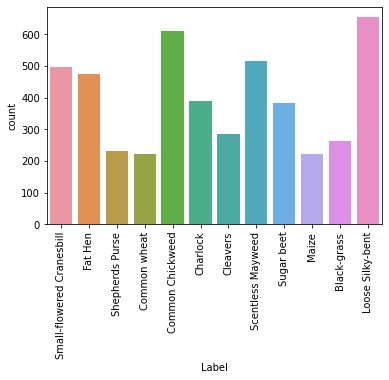

In [14]:
# display plot of plant classes and counts
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

In [15]:
# display value counts
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [16]:
# get percentages of each plant seedling class in the dataset
labels['Label'].value_counts(normalize=True)

Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
Name: Label, dtype: float64

- We can see above that the dataset is not balanced. 
- There are around 600 samples of 'Loose Silky-bent' and 'Common Chickweed' plants compared to only 200 samples of 'Maize', 'Common Wheat' or 'Shepherd's Purse'.



## Data Preprocessing

### Resizing images
Let us leave the size of the images as they are, since they are relatively small and as the dataset is not too large, model computation should not take too long.


In [17]:
#images_decreased=[]
#height = 64
#width = 64
#dimensions = (width, height)  
#for i in range(len(images)):
#  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

## Visualizing images using Gaussian Blur

Let us try to reduce/soften noise in the images using Gaussian Blurring

In [18]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0.3))

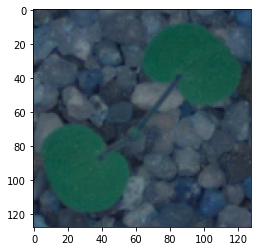

In [19]:
# display image before blurring
plt.imshow(images[20])

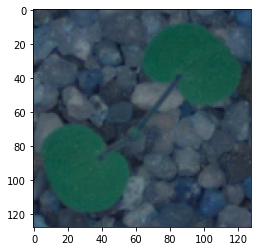

In [20]:
# display image after applying Gaussian blur
plt.imshow(images_gb[20])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

## Color detection

Let us try to detect green color in the images. 

In [21]:
# define function to apply mask to images
images_masked = []
def applyMask(imagesToMask):
  for i in range(len(imagesToMask)):
    img = imagesToMask[i]
    # convert image to hsv format
    imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # create a mask for green
    mask = cv2.inRange(imghsv, (25, 25, 15), (70, 255,255))
    # slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    # save the new image
    images_masked.append(green)
  return images_masked

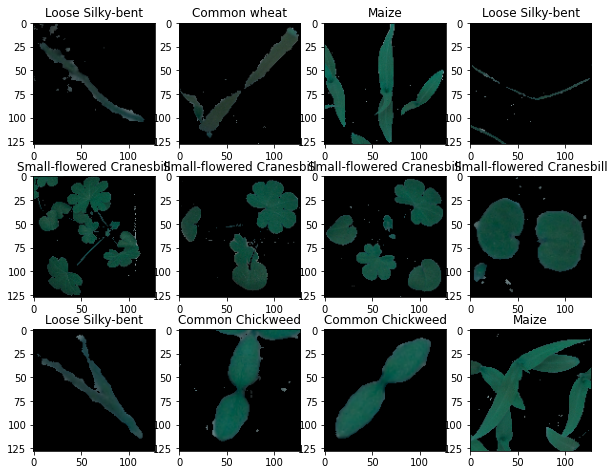

In [22]:
# apply mask on images dataset
images_masked = applyMask(images)

# display some random images
plot_images(np.array(images_masked), labels)

We have removed most of the noise in the background. Let us use these new images to build our model.

In [23]:
# update image data
images = images_masked.copy()

## Splitting the dataset
We will use 10% of our data for testing, 10% for validation and 80% of our data for training.
We are using the train_test_split() function from scikit-learn.

In [24]:
# split data into train, test and validation sets: 80:10:10
X_train, X_test, y_train, y_test = train_test_split(np.array(images),labels,
    test_size=0.1, shuffle = True, random_state = 1, stratify=labels)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.1, random_state= 1, stratify=y_train) 

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (3847, 128, 128, 3)
X_test shape: (475, 128, 128, 3)
y_train shape: (3847, 1)
y_test shape: (475, 1)
X_val shape: (428, 128, 128, 3)
y val shape: (428, 1)


## Data Normalization
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [25]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

In [26]:
# get the shape of the split image datasets
print(X_train_normalized.shape)
print(X_val_normalized.shape)
print(X_test_normalized.shape)

(3847, 128, 128, 3)
(428, 128, 128, 3)
(475, 128, 128, 3)


## Encoding the target labels
Convert labels from names to one hot vectors

In [27]:
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded = enc.fit_transform(y_val)
y_test_encoded=enc.transform(y_test)

In [28]:
# get the shape of the split target labels
print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3847, 12)
(428, 12)
(475, 12)


## Model Evaluation Metrics

Accuracy is not a good measure of model performance when the dataset is imbalanced. We will focus on precision, recall and F1 score when comparing models. We can also try oversampling to address the imbalance in the dataset. 

Let us define a function that will generate and print a confusion matrix and classification report based on model predictions.

In [29]:
# define function to print confusion matrix and classification report using predicted values
def printConfusionMatrixAndReport(y_pred):
  # obtain the categorical values from y_test_encoded and y_pred
  y_pred_vals=np.argmax(y_pred,axis=1)
  y_test_vals=np.argmax(y_test_encoded,axis=1)

  # plot the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
  confusion_matrix = tf.math.confusion_matrix(y_test_vals,y_pred_vals)
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(
      confusion_matrix,
      annot=True,
      linewidths=.4,
      fmt="d",
      square=True,
      ax=ax,
      #xticklabels=labels['Label'].unique(),
      #yticklabels=labels['Label'].unique(),
  )
  plt.show()

  # print classfication report
  print(classification_report(y_test_vals, y_pred_vals))

In [30]:
# define function to plot train accuracy vs validation accuracy
def plotModelAccuracy(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [31]:
# define function to plot train loss vs validation loss
def plotLossCurves(model, history):
  # Capturing loss history per epoch
  hist  = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  # plot loss at different epochs
  plt.plot(hist['loss'])
  plt.plot(hist['val_loss'])
  plt.legend(("train" , "valid") , loc =0)
  # print plot
  plt.show()

## Model Building - Convolutional Neural Network (CNN)
Let's create a CNN model sequentially, where we will be adding the layers one after another.



First, we need to clear the previous model's history from the session.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Let's fix the seed again after clearing the backend. Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [32]:
# set defaults
epochs = 30
batch_size = 64
random_seed = 1

# define early stopping callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
# define callback to reduce LR rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=0.0001,mode='auto')

In [33]:
# clear backend
backend.clear_session()

# fix the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

## CNN Model

Now, let's build a CNN Model with the following 2 main parts -

- The Feature Extraction layers which are comprised of convolutional and pooling layers.
- The Fully Connected classification layers for prediction.


In [34]:
# intialize a sequential model
model_base = Sequential()

model_base.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))
model_base.add(MaxPooling2D((2, 2), padding = 'same'))

model_base.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_base.add(MaxPooling2D((2, 2), padding = 'same'))

# flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model_base.add(Flatten())

model_base.add(Dense(16, activation='relu'))
model_base.add(Dropout(0.3))
# add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_base.add(Dense(12, activation='softmax'))

opt=Adam()
# compile model
model_base.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# generate the summary of the model
model_base.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

### Fitting the model


In [35]:
# fit the model
history_base = model_base.fit(X_train_normalized, 
                      y_train_encoded,  
                      epochs=epochs, shuffle=True,
                      batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded], callbacks=[es])  

Epoch 1/30
61/61 [==============================] - 7s 50ms/step - loss: 2.1890 - accuracy: 0.2625 - val_loss: 1.8189 - val_accuracy: 0.4626
Epoch 2/30
61/61 [==============================] - 2s 39ms/step - loss: 1.7945 - accuracy: 0.3977 - val_loss: 1.5109 - val_accuracy: 0.5654
Epoch 3/30
61/61 [==============================] - 2s 40ms/step - loss: 1.5211 - accuracy: 0.4939 - val_loss: 1.3174 - val_accuracy: 0.6425
Epoch 4/30
61/61 [==============================] - 2s 38ms/step - loss: 1.3225 - accuracy: 0.5464 - val_loss: 1.2201 - val_accuracy: 0.6379
Epoch 5/30
61/61 [==============================] - 2s 38ms/step - loss: 1.1330 - accuracy: 0.6057 - val_loss: 1.1751 - val_accuracy: 0.6332
Epoch 6/30
61/61 [==============================] - 2s 39ms/step - loss: 1.0446 - accuracy: 0.6249 - val_loss: 1.1079 - val_accuracy: 0.6495
Epoch 7/30
61/61 [==============================] - 2s 39ms/step - loss: 0.8838 - accuracy: 0.6751 - val_loss: 1.1280 - val_accuracy: 0.6542
Epoch 8/30
61

### Model Evaluation

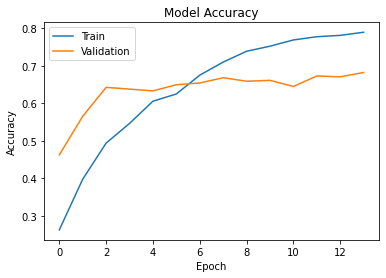

In [36]:
# plot training vs validation accuracy 
plotModelAccuracy(history_base)

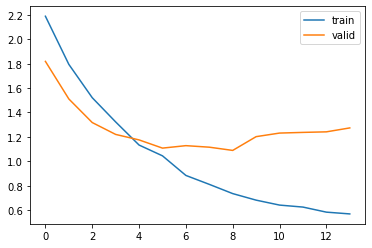

In [37]:
# plot training loss vs validation loss
plotLossCurves(model_base, history_base)

In [38]:
# get accuracy on test data
accuracy = model_base.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.2157 - accuracy: 0.6758 - 401ms/epoch - 27ms/step


In [39]:
# get the output as probablities for each category
y_pred=model_base.predict(X_test_normalized)

### Plotting the Confusion Matrix
- The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
- The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

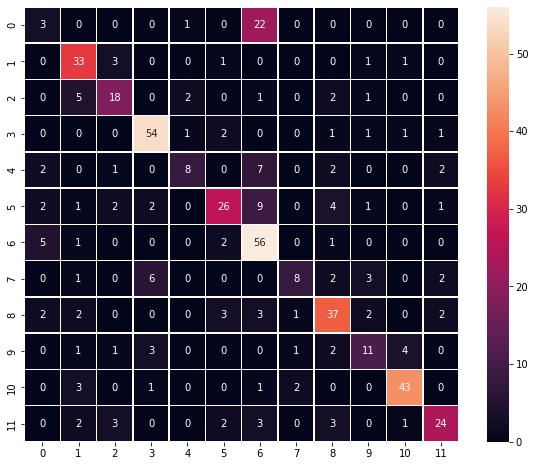

              precision    recall  f1-score   support

           0       0.21      0.12      0.15        26
           1       0.67      0.85      0.75        39
           2       0.64      0.62      0.63        29
           3       0.82      0.89      0.85        61
           4       0.67      0.36      0.47        22
           5       0.72      0.54      0.62        48
           6       0.55      0.86      0.67        65
           7       0.67      0.36      0.47        22
           8       0.69      0.71      0.70        52
           9       0.55      0.48      0.51        23
          10       0.86      0.86      0.86        50
          11       0.75      0.63      0.69        38

    accuracy                           0.68       475
   macro avg       0.65      0.61      0.61       475
weighted avg       0.67      0.68      0.66       475



In [40]:
# plot confusion matrix and print classificatrion report
printConfusionMatrixAndReport(y_pred)

**Observations**

- Looking at the f1 score of each class, we observe that most of the classes are not predicted correctly.
- Classes 1, 3 and 10 are better classified than others.
- The remaining categories have a lot of misclassifications.
- We can see from the above plot that the training accuracy and the validation accuracy is not good.
- The model seems to overfit on the data.

## RandomOverSampler

Let us try to balance the dataset using RandomOverSampler.

In [41]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

### Label Encoding for OverSampling

In [42]:
# do label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_val_le = le.fit_transform(y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# get counts for all classes
from collections import Counter
print(y_train_le.shape)
print(y_val_le.shape)
print(Counter(y_train_le))
print(Counter(y_val_le))

(3847,)
(428,)
Counter({6: 530, 3: 495, 8: 418, 10: 402, 5: 384, 1: 316, 11: 312, 2: 232, 0: 213, 9: 187, 7: 179, 4: 179})
Counter({6: 59, 3: 55, 8: 46, 10: 44, 5: 43, 1: 35, 11: 35, 2: 26, 0: 24, 9: 21, 7: 20, 4: 20})


In [44]:
# generate oversampled data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]), y_train_le)
X_val_ros, y_val_ros = ros.fit_resample(X_val.reshape(X_val.shape[0], X_val.shape[1]*X_val.shape[2]*X_val.shape[3]), y_val_le)

In [45]:
# print number of samples in X train and val oversampled datasets
print(X_train_ros.shape)
X_train_ros = X_train_ros.reshape(X_train_ros.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])
print(X_train_ros.shape)
print(X_val_ros.shape)
X_val_ros = X_val_ros.reshape(X_val_ros.shape[0], X_val.shape[1], X_val.shape[2], X_val.shape[3])
print(X_val_ros.shape)

# print class counts y 
print(Counter(y_train_ros))
print(Counter(y_val_ros))

# print number of samples in y train and val oversampled datasets
print(y_train_ros.shape)
y_train_ros = y_train_ros.reshape(y_train_ros.shape[0],1)
print(y_train_ros.shape)
print(y_val_ros.shape)
y_val_ros = y_val_ros.reshape(y_val_ros.shape[0],1)
print(y_val_ros.shape)

(6360, 49152)
(6360, 128, 128, 3)
(708, 49152)
(708, 128, 128, 3)
Counter({2: 530, 0: 530, 6: 530, 5: 530, 1: 530, 8: 530, 3: 530, 9: 530, 10: 530, 11: 530, 7: 530, 4: 530})
Counter({1: 59, 7: 59, 9: 59, 2: 59, 10: 59, 3: 59, 6: 59, 8: 59, 4: 59, 5: 59, 11: 59, 0: 59})
(6360,)
(6360, 1)
(708,)
(708, 1)


### Encoding the target labels
Convert labels from names to one hot vectors

In [46]:
# convert labels from names to one hot vectors.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_ros_encoded = enc.fit_transform(y_train_ros)
y_val_ros_encoded = enc.fit_transform(y_val_ros)

### Data Normalization
Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.


In [47]:
# normalize the image pixels
X_train_ros_normalized = X_train_ros.astype('float32')/255.0
X_val_ros_normalized = X_val_ros.astype('float32')/255.0

In [48]:
print(X_train_ros_normalized.shape)
print(X_val_ros_normalized.shape)
print(X_test_normalized.shape)

(6360, 128, 128, 3)
(708, 128, 128, 3)
(475, 128, 128, 3)


### Building the model

In [49]:
# intialize a sequential model
model_os = Sequential()

# add first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# input_shape denotes input image dimension of images
model_os.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(128, 128, 3)))

# add max pooling to reduce the size of output of first conv layer
model_os.add(MaxPooling2D((2, 2), padding = 'same'))

model_os.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_os.add(MaxPooling2D((2, 2), padding = 'same'))

# flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model_os.add(Flatten())

# add a fully connected dense layer with 100 neurons    
model_os.add(Dense(16, activation='relu'))
model_os.add(Dropout(0.3))
# add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model_os.add(Dense(12, activation='softmax'))

# use adam optimizer
opt=Adam()
# compile model
model_os.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# generating the summary of the model
model_os.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 16)                5

### Fitting the model

In [50]:
# fit the model on train data
history_os=model_os.fit(X_train_normalized, 
          y_train_encoded,  
          epochs=epochs, shuffle=True,
          batch_size=batch_size, validation_data=[X_val_normalized, y_val_encoded],callbacks=[es])  

Epoch 1/30
61/61 [==============================] - 3s 43ms/step - loss: 2.1894 - accuracy: 0.2605 - val_loss: 1.8105 - val_accuracy: 0.4533
Epoch 2/30
61/61 [==============================] - 2s 39ms/step - loss: 1.7862 - accuracy: 0.4055 - val_loss: 1.5052 - val_accuracy: 0.5701
Epoch 3/30
61/61 [==============================] - 2s 39ms/step - loss: 1.5252 - accuracy: 0.4929 - val_loss: 1.3257 - val_accuracy: 0.6192
Epoch 4/30
61/61 [==============================] - 2s 39ms/step - loss: 1.3244 - accuracy: 0.5425 - val_loss: 1.2199 - val_accuracy: 0.6706
Epoch 5/30
61/61 [==============================] - 2s 39ms/step - loss: 1.1547 - accuracy: 0.5984 - val_loss: 1.2130 - val_accuracy: 0.6285
Epoch 6/30
61/61 [==============================] - 2s 39ms/step - loss: 1.0587 - accuracy: 0.6132 - val_loss: 1.0938 - val_accuracy: 0.6636
Epoch 7/30
61/61 [==============================] - 2s 38ms/step - loss: 0.9215 - accuracy: 0.6558 - val_loss: 1.1477 - val_accuracy: 0.6519
Epoch 8/30
61

### Model Evaluation

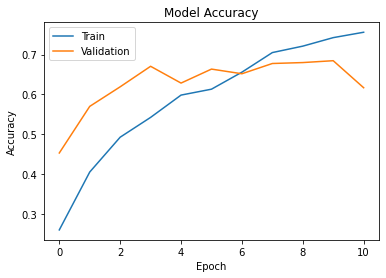

In [51]:
# plot training vs validation accuracy
plotModelAccuracy(history_os)

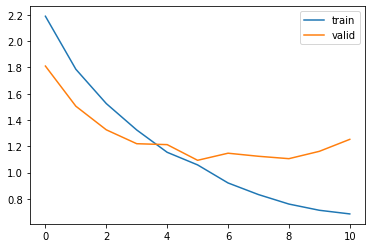

In [52]:
# plot training vs validation loss
plotLossCurves(model_os, history_os)

In [53]:
# evaluate model on test data
accuracy = model_os.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1851 - accuracy: 0.6337 - 172ms/epoch - 11ms/step


In [54]:
# get the output as probablities for each category
y_pred=model_os.predict(X_test_normalized)

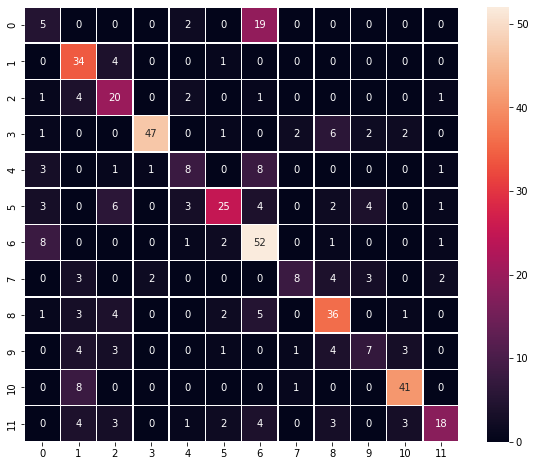

              precision    recall  f1-score   support

           0       0.23      0.19      0.21        26
           1       0.57      0.87      0.69        39
           2       0.49      0.69      0.57        29
           3       0.94      0.77      0.85        61
           4       0.47      0.36      0.41        22
           5       0.74      0.52      0.61        48
           6       0.56      0.80      0.66        65
           7       0.67      0.36      0.47        22
           8       0.64      0.69      0.67        52
           9       0.44      0.30      0.36        23
          10       0.82      0.82      0.82        50
          11       0.75      0.47      0.58        38

    accuracy                           0.63       475
   macro avg       0.61      0.57      0.57       475
weighted avg       0.65      0.63      0.63       475



In [55]:
# print confusion matrix
printConfusionMatrixAndReport(y_pred)

**Observations**

- We can see that the confusion matrix generated for this model trained on oversampled data is very similar to the base model.
- The above plots show that the training accuracy and validation accuracy have not improved much over the base model without oversampling.
- The model continues to overfit the data.
- Oversampling has not helped us overcome the imbalance in the dataset.

## More Layers

Lets try to build another CNN model with more layers added to the model.

In [56]:
# clear backend
backend.clear_session()

# fix the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [57]:
# initialize a sequential model
model_adv = Sequential()
# add conv layers with 32 filters and kernel size 3x3 , with ReLU activation and padding 'same' provides the output size same as the input size
# input_shape denotes input image dimension of images
model_adv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model_adv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_adv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_adv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_adv.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flatten the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_adv.add(Flatten())
# add first fully connected dense layer with 64 neurons 
model_adv.add(Dense(64, activation = "relu"))
# add second fully connected dense layer with 32 neurons 
model_adv.add(Dense(32, activation = "relu"))

# add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model_adv.add(Dense(12, activation = "softmax"))

optimizer = Adam(learning_rate=0.001)
model_adv.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

model_adv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 flatten (Flatten)           (None, 524288)            0         
                                                                 
 dense (Dense)               (None, 64)                3

### Fitting the model

In [58]:
# fit the model on train data
history_adv=model_adv.fit(X_train_normalized, 
                    y_train_encoded,  
                    epochs=epochs, 
                    batch_size=batch_size,validation_data=[X_val_normalized, y_val_encoded],
                    callbacks=[es],
                    use_multiprocessing=True)

Epoch 1/30
61/61 [==============================] - 10s 141ms/step - loss: 1.8208 - accuracy: 0.3964 - val_loss: 1.2328 - val_accuracy: 0.6051
Epoch 2/30
61/61 [==============================] - 8s 131ms/step - loss: 0.9215 - accuracy: 0.7107 - val_loss: 1.0018 - val_accuracy: 0.6659
Epoch 3/30
61/61 [==============================] - 8s 131ms/step - loss: 0.4451 - accuracy: 0.8573 - val_loss: 1.0469 - val_accuracy: 0.6822
Epoch 4/30
61/61 [==============================] - 8s 132ms/step - loss: 0.1652 - accuracy: 0.9462 - val_loss: 1.5208 - val_accuracy: 0.6495
Epoch 5/30
61/61 [==============================] - 8s 132ms/step - loss: 0.0669 - accuracy: 0.9805 - val_loss: 2.0531 - val_accuracy: 0.6495
Epoch 6/30
61/61 [==============================] - 8s 132ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 2.1742 - val_accuracy: 0.6402
Epoch 7/30
61/61 [==============================] - 8s 133ms/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 2.7117 - val_accuracy: 0.6495
Epoch

### Model Evaluation

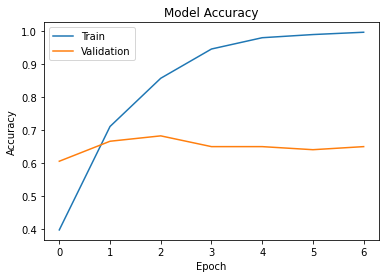

In [59]:
# plot training vs validation accuracy
plotModelAccuracy(history_adv)

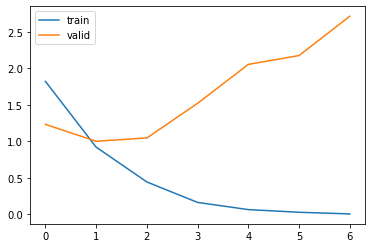

In [60]:
# plot training vs validation loss
plotLossCurves(model_adv, history_adv)

In [61]:
# get model accuracy on test data
accuracy = model_adv.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 2.2685 - accuracy: 0.6989 - 612ms/epoch - 41ms/step


In [62]:
# get the output as probablities for each category
y_pred=model_adv.predict(X_test_normalized)

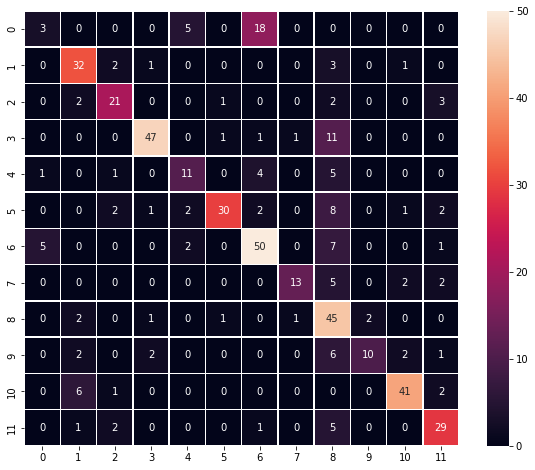

              precision    recall  f1-score   support

           0       0.33      0.12      0.17        26
           1       0.71      0.82      0.76        39
           2       0.72      0.72      0.72        29
           3       0.90      0.77      0.83        61
           4       0.55      0.50      0.52        22
           5       0.91      0.62      0.74        48
           6       0.66      0.77      0.71        65
           7       0.87      0.59      0.70        22
           8       0.46      0.87      0.60        52
           9       0.83      0.43      0.57        23
          10       0.87      0.82      0.85        50
          11       0.72      0.76      0.74        38

    accuracy                           0.70       475
   macro avg       0.71      0.65      0.66       475
weighted avg       0.73      0.70      0.69       475



In [63]:
# plot confusion matrix and print classificatrion report
printConfusionMatrixAndReport(y_pred)

**Observations**

- We can see from the above plots that the training accuracy of the model has improved greatly but the validation accuracy is not good.
- Testing accuracy has not improved from the previous base model This is due to the overfitting. The model is capturing noise in the data.
- f1 score for most classes is below 80.
- For class 0, recall is 0.12 which is extremely low. 

## Pooling, Dropout and Batch Normalization

Lets try to build another CNN model, and use Pooling, Dropout and Batch Normalization to reduce overfitting and make the model more generalized.

In [64]:
# clear backend
backend.clear_session()

# fix the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [65]:
# initialize a sequential model
model_adv_gn = Sequential()
# add first conv layer with 256 filters and kernel size 5x5 , with ReLU activation and padding 'same' provides the output size same as the input size
# input_shape denotes input image dimension of images
model_adv_gn.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# add max pooling to reduce the size of output of first conv layer
model_adv_gn.add(MaxPool2D(pool_size=(2,2)))
# add dropout to randomly switch off 25% neurons to reduce overfitting

# add second conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_adv_gn.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# add max pooling to reduce the size of output of first conv layer
model_adv_gn.add(MaxPool2D(pool_size=(2,2)))
# add dropout to randomly switch off 25% neurons to reduce overfitting

# add third conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_adv_gn.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# add max pooling to reduce the size of output of first conv layer
model_adv_gn.add(MaxPool2D(pool_size=(2,2)))
# add dropout to randomly switch off 30% neurons to reduce overfitting
model_adv_gn.add(Dropout(0.3))

# add forth conv layer with 256 filters and with kernel size 3x3 and ReLu activation function
model_adv_gn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# add max pooling to reduce the size of output of first conv layer
model_adv_gn.add(MaxPool2D(pool_size=(2,2)))
# add dropout to randomly switch off 30% neurons to reduce overfitting
model_adv_gn.add(Dropout(0.3))
model_adv_gn.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flatten the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_adv_gn.add(Flatten())
# add first fully connected dense layer with 64 neurons 
model_adv_gn.add(Dense(64, activation = "relu"))
model_adv_gn.add(BatchNormalization())
# add second fully connected dense layer with 32 neurons 
model_adv_gn.add(Dense(32, activation = "relu"))
model_adv_gn.add(BatchNormalization())

# add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model_adv_gn.add(Dense(12, activation = "softmax"))

# use Adam optimizer
optimizer = Adam(learning_rate=0.001)

# compile model
model_adv_gn.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# generate summary
model_adv_gn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

### Fitting the model

In [66]:
# fit the model on train data
history_adv_gn=model_adv_gn.fit(X_train_normalized, 
                      y_train_encoded,  
                      epochs=epochs, 
                      batch_size=batch_size,
                      validation_data=[X_val_normalized, y_val_encoded],callbacks=[es, reduce_lr],
                      use_multiprocessing=True)

Epoch 1/30
61/61 [==============================] - 14s 178ms/step - loss: 2.0898 - accuracy: 0.2945 - val_loss: 2.2080 - val_accuracy: 0.3107 - lr: 0.0010
Epoch 2/30
61/61 [==============================] - 9s 155ms/step - loss: 1.5928 - accuracy: 0.4617 - val_loss: 1.6045 - val_accuracy: 0.5257 - lr: 0.0010
Epoch 3/30
61/61 [==============================] - 9s 155ms/step - loss: 1.2982 - accuracy: 0.5792 - val_loss: 1.3475 - val_accuracy: 0.5631 - lr: 0.0010
Epoch 4/30
61/61 [==============================] - 9s 155ms/step - loss: 1.0772 - accuracy: 0.6483 - val_loss: 1.1219 - val_accuracy: 0.6636 - lr: 0.0010
Epoch 5/30
61/61 [==============================] - 9s 154ms/step - loss: 0.8729 - accuracy: 0.7242 - val_loss: 1.0875 - val_accuracy: 0.6355 - lr: 0.0010
Epoch 6/30
61/61 [==============================] - 9s 154ms/step - loss: 0.7755 - accuracy: 0.7544 - val_loss: 0.8816 - val_accuracy: 0.6869 - lr: 0.0010
Epoch 7/30
61/61 [==============================] - 9s 154ms/step - l

### Model Evaluation

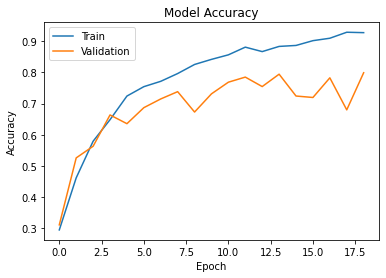

In [67]:
# plot training vs validation accuracy
plotModelAccuracy(history_adv_gn)

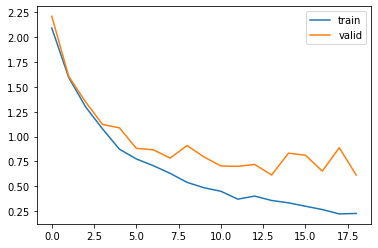

In [68]:
# plot training vs validation loss
plotLossCurves(model_adv_gn, history_adv_gn)

In [69]:
# get testing loss and accuracy
accuracy = model_adv_gn.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.6719 - accuracy: 0.7853 - 1s/epoch - 95ms/step


In [70]:
# get output as probablities for each category
y_pred=model_adv_gn.predict(X_test_normalized)

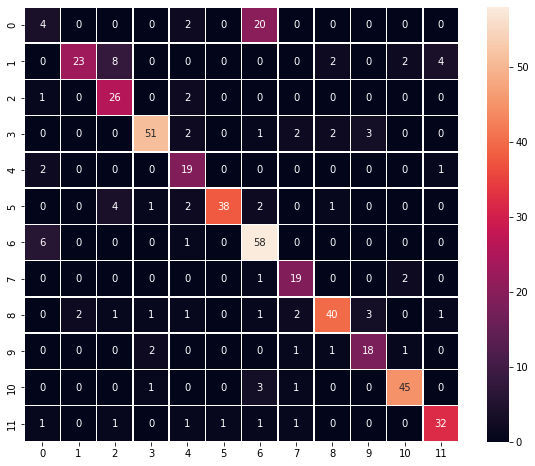

              precision    recall  f1-score   support

           0       0.29      0.15      0.20        26
           1       0.92      0.59      0.72        39
           2       0.65      0.90      0.75        29
           3       0.91      0.84      0.87        61
           4       0.63      0.86      0.73        22
           5       0.97      0.79      0.87        48
           6       0.67      0.89      0.76        65
           7       0.73      0.86      0.79        22
           8       0.87      0.77      0.82        52
           9       0.75      0.78      0.77        23
          10       0.90      0.90      0.90        50
          11       0.84      0.84      0.84        38

    accuracy                           0.79       475
   macro avg       0.76      0.77      0.75       475
weighted avg       0.79      0.79      0.78       475



In [71]:
# plot confusion matrix and print classificatrion report
printConfusionMatrixAndReport(y_pred)

**Observations**

- We can observe that classes 0, 1, 4, 6, 9 are heavily misclassified.
- The recall and precision has improved for most classes.
- We can see from the above plots that the training accuracy of the model is good and the validation accuracy has improved greatly.
- However, the model still overfits on the data.

## Data Augmentation

Let us try data augmentation to address the overfitting issue. 

In [72]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [73]:
# use ImageDataGenerator to generate augmented images that are rotated etc.
train_datagen = ImageDataGenerator(
                             # horizontal_flip = True,
                             # vertical_flip = False, 
                             # height_shift_range= 0.1, 
                             # width_shift_range=0.1, 
                             # rotation_range=20, 
                             # shear_range = 0.1,
                             #  zoom_range=0.1
                             rotation_range=20, 
                             fill_mode='nearest'
                            )

# flow train images in batches of batch_size using train_datagen
train_generator = train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=random_seed,
                                       shuffle=False)

validation_datagen  = ImageDataGenerator()

# flow testing images in batches of batch_size using validation_datagen
validation_generator =  validation_datagen.flow(X_val_normalized, y_val_encoded, batch_size=batch_size)

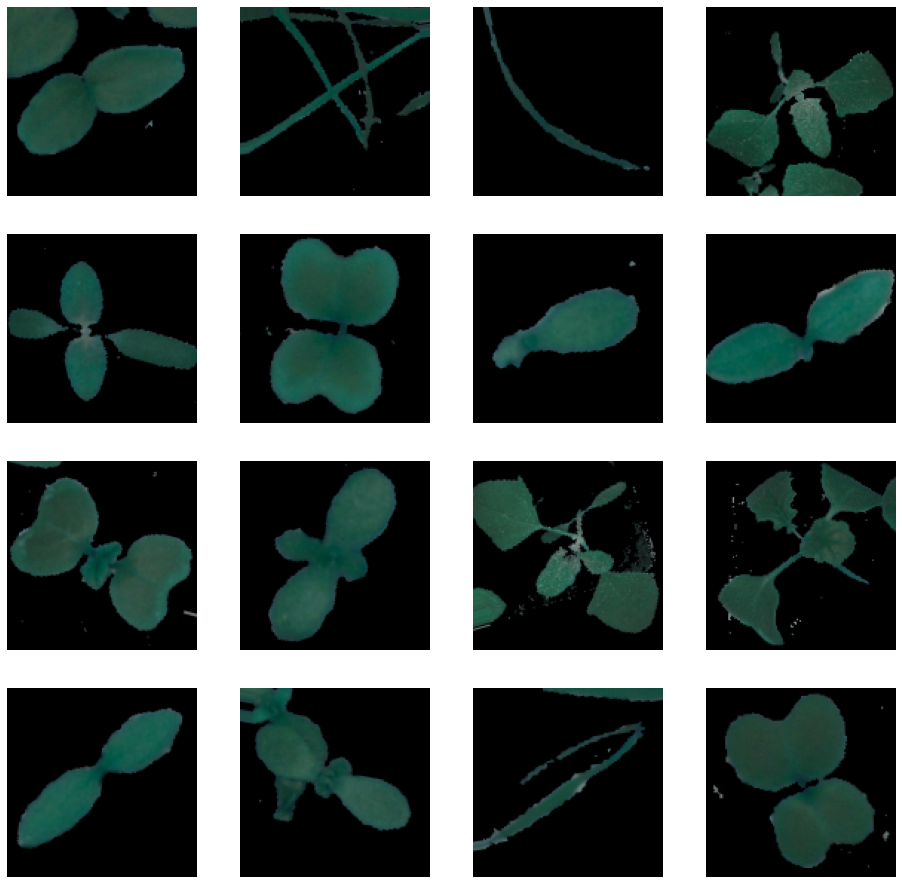

In [74]:
# display augmented images
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    ax.axis('off')

In [75]:
# initialize a sequential model
model_da = Sequential()
# add first conv layer with 256 filters and kernel size 3x3 , with ReLU activation and padding 'same' provides the output size same as the input size
# input_shape denotes input image dimension of images
model_da.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
# add max pooling to reduce the size of output of first conv layer
model_da.add(MaxPool2D(pool_size=(2,2)))

# add second conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_da.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# add max pooling to reduce the size of output of first conv layer
model_da.add(MaxPool2D(pool_size=(2,2)))

# add third conv layer with 128 filters and with kernel size 3x3 and ReLu activation function
model_da.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# add max pooling to reduce the size of output of first conv layer
model_da.add(MaxPool2D(pool_size=(2,2)))
# add batch normalization
model_da.add(BatchNormalization())

# add forth conv layer with 64 filters and with kernel size 3x3 and ReLu activation function
model_da.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
# add max pooling to reduce the size of output of first conv layer
model_da.add(MaxPool2D(pool_size=(2,2)))
# add batch normalization
model_da.add(BatchNormalization())

# add another conv layer with 64 filters and kernel size 3x3 with ReLu activation function
model_da.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# flatten the 3-d output of the conv layer after max pooling to make it ready for creating dense connections
model_da.add(Flatten())

# add first fully connected dense layer with 64neurons 
model_da.add(Dense(64, activation = "relu"))
model_da.add(BatchNormalization())

# add second fully connected dense layer with 32 neurons 
model_da.add(Dense(32, activation = "relu"))
model_da.add(BatchNormalization())

# adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem with 12 classes.
model_da.add(Dense(12, activation = "softmax"))

# use Adam optimizer
optimizer = Adam(learning_rate=0.01)

# compile the model
model_da.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# generate summary
model_da.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

### Fitting the model

In [76]:
history_da = model_da.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=batch_size, 
                    verbose=1,
                    validation_data=validation_generator.next(),
                    callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
64/64 [==============================] - 17s 250ms/step - loss: 1.7562 - accuracy: 0.3753 - val_loss: 52.3426 - val_accuracy: 0.0625 - lr: 0.0100
Epoch 2/30
64/64 [==============================] - 15s 234ms/step - loss: 1.3595 - accuracy: 0.5207 - val_loss: 8.3001 - val_accuracy: 0.1250 - lr: 0.0100
Epoch 3/30
64/64 [==============================] - 16s 238ms/step - loss: 1.1073 - accuracy: 0.5984 - val_loss: 10.6199 - val_accuracy: 0.1250 - lr: 0.0100
Epoch 4/30
64/64 [==============================] - 16s 238ms/step - loss: 0.9770 - accuracy: 0.6549 - val_loss: 3.2683 - val_accuracy: 0.2969 - lr: 0.0100
Epoch 5/30
64/64 [==============================] - 15s 236ms/step - loss: 0.7804 - accuracy: 0.7215 - val_loss: 3.6962 - val_accuracy: 0.2344 - lr: 0.0100
Epoch 6/30
64/64 [==============================] - 15s 236ms/step - loss: 0.7010 - accuracy: 0.7559 - val_loss: 4.6252 - val_accuracy: 0.2969 - lr: 0.0100
Epoch 7/30
64/64 [==============================] - 15s 234ms/

### Model Evaluation

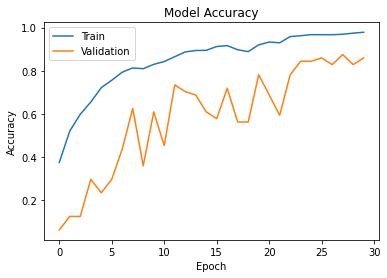

In [77]:
# plot training accuracy vs validation accuracy
plotModelAccuracy(history_da)

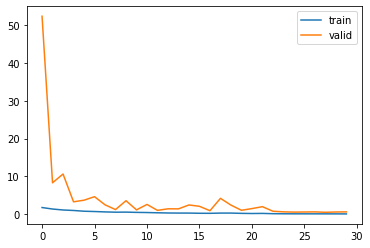

In [78]:
# plot training loss vs validation loss
plotLossCurves(model_da, history_da)

In [79]:
# evaluate model on test data
accuracy = model_da.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.4063 - accuracy: 0.8800 - 1s/epoch - 97ms/step


In [80]:
# get the output as probablities for each category
y_pred=model_da.predict(X_test_normalized)

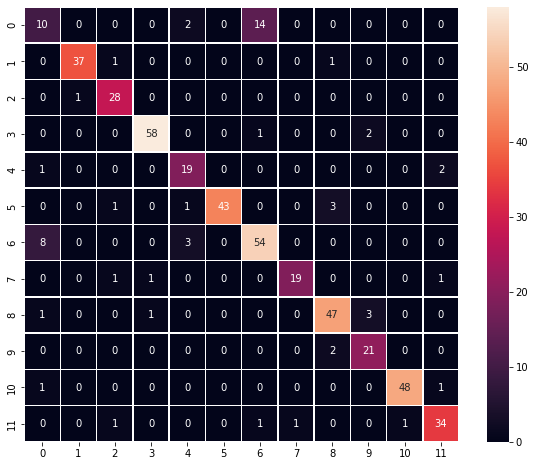

              precision    recall  f1-score   support

           0       0.48      0.38      0.43        26
           1       0.97      0.95      0.96        39
           2       0.88      0.97      0.92        29
           3       0.97      0.95      0.96        61
           4       0.76      0.86      0.81        22
           5       1.00      0.90      0.95        48
           6       0.77      0.83      0.80        65
           7       0.95      0.86      0.90        22
           8       0.89      0.90      0.90        52
           9       0.81      0.91      0.86        23
          10       0.98      0.96      0.97        50
          11       0.89      0.89      0.89        38

    accuracy                           0.88       475
   macro avg       0.86      0.86      0.86       475
weighted avg       0.88      0.88      0.88       475



In [81]:
# plot confusion matrix and print classificatrion report
printConfusionMatrixAndReport(y_pred)

**Observations**
- The confusion matrix has improved greatly. 
- We can see that other than classes 0, 4 and 6, all the other classes have f1 score over 85. 
- Classes 1, 3 and 10 have been classified pretty well, they both have an f1 score of over 95. 
- Training accuracy of the model is around 0.97 and testing accuracy is about 0.88. So overfitting has also reduced. 


## Transfer Learning
Let us try Transfer Learning with Data Agumentation. We will use a pre-built model, MobileNetV2 which was trained on ImageNet dataset. 

We will directly use the convolutional and pooling layers and freeze their weights. For classification, we will :replace the existing fully connected layers with those created specifically for our problem. 


In [82]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

In [83]:
# loading MobileNetV2 model 
from tensorflow.keras.applications import MobileNetV2
pt_model = MobileNetV2(weights='imagenet', include_top = False, input_shape = (128,128,3))
pt_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [84]:
# make all the layers of the pretrained model non-trainable. i.e. freezing them
for layer in pt_model.layers:
    layer.trainable = False

In [85]:
# check that layers are not trainable
for layer in pt_model.layers:
    print(layer.name, layer.trainable)

input_1 False
Conv1 False
bn_Conv1 False
Conv1_relu False
expanded_conv_depthwise False
expanded_conv_depthwise_BN False
expanded_conv_depthwise_relu False
expanded_conv_project False
expanded_conv_project_BN False
block_1_expand False
block_1_expand_BN False
block_1_expand_relu False
block_1_pad False
block_1_depthwise False
block_1_depthwise_BN False
block_1_depthwise_relu False
block_1_project False
block_1_project_BN False
block_2_expand False
block_2_expand_BN False
block_2_expand_relu False
block_2_depthwise False
block_2_depthwise_BN False
block_2_depthwise_relu False
block_2_project False
block_2_project_BN False
block_2_add False
block_3_expand False
block_3_expand_BN False
block_3_expand_relu False
block_3_pad False
block_3_depthwise False
block_3_depthwise_BN False
block_3_depthwise_relu False
block_3_project False
block_3_project_BN False
block_4_expand False
block_4_expand_BN False
block_4_expand_relu False
block_4_depthwise False
block_4_depthwise_BN False
block_4_depthwi

In [86]:
# initialize the model
model_tl = Sequential()

# add the convolutional part of the pretrained model from above
model_tl.add(pt_model)

# flatten the output of the pretrained model because it is from a convolutional layer
model_tl.add(Flatten())

# add a dense input layer
model_tl.add(Dense(32, activation='relu'))

# add output layer
model_tl.add(Dense(12, activation='softmax'))

# compile the model
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# summary of the model
model_tl.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 32)                655392    
                                                                 
 dense_1 (Dense)             (None, 12)                396       
                                                                 
Total params: 2,913,772
Trainable params: 655,788
Non-trainable params: 2,257,984
_________________________________________________________________


### Fitting the model

In [87]:
# fit the model on training data
history_tl = model_tl.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=random_seed,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=16, 
                    validation_data=validation_generator.next(),
                    verbose=1, callbacks=[reduce_lr],use_multiprocessing=True)

Epoch 1/30
16/16 [==============================] - 8s 282ms/step - loss: 2.8852 - accuracy: 0.2420 - val_loss: 2.1658 - val_accuracy: 0.2344 - lr: 0.0010
Epoch 2/30
16/16 [==============================] - 4s 239ms/step - loss: 1.9322 - accuracy: 0.3281 - val_loss: 1.6817 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/30
16/16 [==============================] - 4s 241ms/step - loss: 1.4048 - accuracy: 0.5459 - val_loss: 1.3977 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 4/30
16/16 [==============================] - 4s 245ms/step - loss: 1.0499 - accuracy: 0.6650 - val_loss: 1.2364 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 5/30
16/16 [==============================] - 4s 241ms/step - loss: 0.9458 - accuracy: 0.6924 - val_loss: 1.0303 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 6/30
16/16 [==============================] - 4s 226ms/step - loss: 0.7665 - accuracy: 0.7756 - val_loss: 0.9286 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/30
16/16 [==============================] - 4s 231ms/step - lo

### Model Evaluation

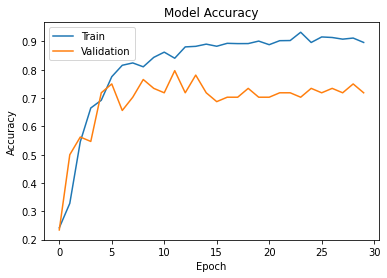

In [88]:
# plot accuracy curves for training vs validation
plotModelAccuracy(history_tl)

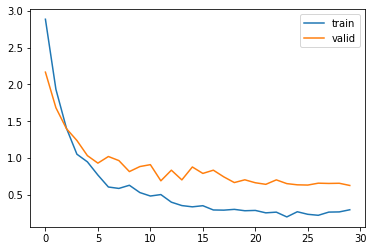

In [89]:
# plot loss curves for training vs validation
plotLossCurves(model_tl, history_tl)

In [90]:
# evaluate model on test data
accuracy = model_tl.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 0.6324 - accuracy: 0.7768 - 1s/epoch - 99ms/step


In [91]:
# get the output as probablities for each category
y_pred=model_tl.predict(X_test_normalized)

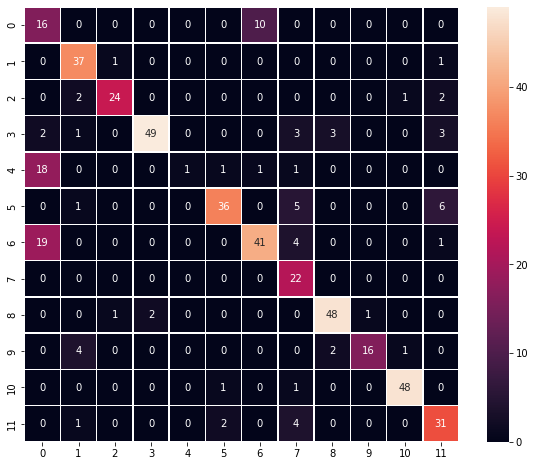

              precision    recall  f1-score   support

           0       0.29      0.62      0.40        26
           1       0.80      0.95      0.87        39
           2       0.92      0.83      0.87        29
           3       0.96      0.80      0.88        61
           4       1.00      0.05      0.09        22
           5       0.90      0.75      0.82        48
           6       0.79      0.63      0.70        65
           7       0.55      1.00      0.71        22
           8       0.91      0.92      0.91        52
           9       0.94      0.70      0.80        23
          10       0.96      0.96      0.96        50
          11       0.70      0.82      0.76        38

    accuracy                           0.78       475
   macro avg       0.81      0.75      0.73       475
weighted avg       0.83      0.78      0.77       475



In [92]:
# plot confusion matrix
printConfusionMatrixAndReport(y_pred)

**Observations**

- According to the confusion matrix and accuracy curve, the MobileNetV2 model does not outperform model_da (with data augmentation). This could be because the plant seedling images we are using are not too similar to the images in ImageNet database that were used to train the MobileNetV2 model. The weights from this model may not be appropriate for the dataset we are using them for. 

## Visualizing predictions

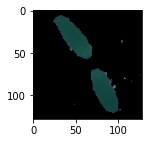

Predicted Label [5]
True Label 5


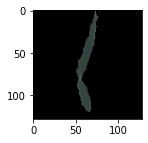

Predicted Label [4]
True Label 0


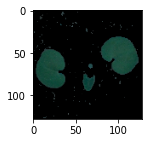

Predicted Label [10]
True Label 10


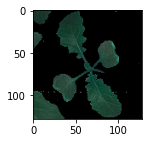

Predicted Label [1]
True Label 1


In [93]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_da.predict((X_test_normalized[2].reshape(1,128,128,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_da.predict((X_test_normalized[33].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', enc.inverse_transform(model_da.predict((X_test_normalized[59].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_da.predict((X_test_normalized[36].reshape(1,128,128,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36]) 


## Conclusions and Recommendations
- To prepare the dataset for the model
  - We tried GaussianBlur but decided against it as it did not seem to help with the noise in the images.
  - We applied a mask on image data to detect and retain only the information that was green, as this is all that we are interested in for plant classification. 
  - We normalized the training data and encoded the target labels.
- We built 6 models: 
  - model_base: a base CNN model, 
  - model_os: a CNN model with oversampled data, 
  - model_adv: an advanced CNN model with more layers, 
  - model_adv_gn: an advanced CNN model with pooling, dropout and batch normalization to make it more generalized,
  - model_da: a model with data augmentation to further reduce overfitting
  - model_tf: and finally a model that used data augmentation as well as transfer learning.
- Among all the models we have tried, model_da (with data augmentation) gives the best performance and we may use this model to classify plant seedlings into their respective 12 categories.
- The reason for limited model performance in general may be inadequate data, the low quality of images as well as imbalance in the classes. Although we have used data augmentation in our final model, it is not a replacement for high quality images with more variety. 
- The gravel/pebbles in the background add a lot of noise to the image and when paired with the small size of the seedlings, may be contributing to poor model performance.
- The seedlings may also have been too small/young to display any  characteristics of the plants. So model classification may yield better results if attempted at a later stage in the plants' growth. However, this may not be an option or not practical if the end goal is to identify weeds in the early stages.
- To get better results in the future, the University could try to procure more images for each category of plants that are of higher quality and preferably with a better background.
